In [7]:
! pip install keras

In [21]:
import keras
import json
import os

import core.__init__ as __init__
import core.data_processor as data_processor
import core.model as model
import core.utils as utils
import run as run

In [12]:
configs = json.load(open('config.json', 'r'))

In [16]:
data = data_processor.DataLoader(
	os.path.join('data', configs['data']['filename']),
	configs['data']['train_test_split'],
	configs['data']['columns']
)

In [23]:
m = model.Model()

m.build_model(configs)
x, y = data.get_train_data(
	seq_len = configs['data']['sequence_length'],
	normalise = configs['data']['normalise']
)

[Model] Model Compiled
Time taken: 0:00:00.556514


In [28]:
m.train(
	x,
	y,
	epochs = configs['training']['epochs'],
	batch_size = configs['training']['batch_size'],
    save_dir = 'Springboard'
)

[Model] Training Started
[Model] 2 epochs, 32 batch size
Epoch 1/2
124/124 [==============================] - 10s 52ms/step - loss: 0.0020
Epoch 2/2
124/124 [==============================] - 7s 56ms/step - loss: 6.6306e-04
[Model] Training Completed. Model saved as Springboard/09022021-123553-e2.h5
Time taken: 0:00:17.075628


In [29]:
x_test, y_test = data.get_test_data(
	seq_len = configs['data']['sequence_length'],
	normalise = configs['data']['normalise']
)

[Model] Predicting Point-by-Point...


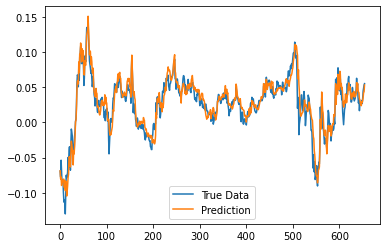

[Model] Predicting Sequences Full...


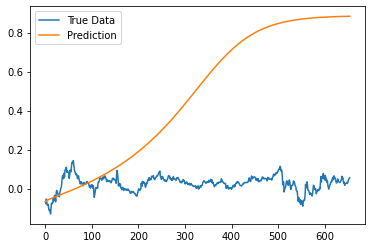

In [33]:
def predict_point_by_point(self, data):
	#Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
	predicted = self.model.predict(data)
	predicted = np.reshape(predicted, (predicted.size,))
	return predicted

def predict_sequence_full(self, data, window_size):
	#Shift the window by 1 new prediction each time, re-run predictions on new window
	curr_frame = data[0]
	predicted = []
	for i in range(len(data)):
		predicted.append(self.model.predict(curr_frame[newaxis,:,:])[0,0])
		curr_frame = curr_frame[1:]
		curr_frame = np.insert(curr_frame, [window_size-2], predicted[-1], axis=0)
	return predicted

predictions_pointbypoint = m.predict_point_by_point(x_test)
run.plot_results(predictions_pointbypoint, y_test)

predictions_fullseq = m.predict_sequence_full(x_test, configs['data']['sequence_length'])
run.plot_results(predictions_fullseq, y_test)

Could have also just done run.main() which has all of these blocks precoded. 

[Model] Model Compiled
Time taken: 0:00:00.526338
[Model] Training Started
[Model] 2 epochs, 32 batch size, 124 batches per epoch
Epoch 1/2
124/124 [==============================] - 10s 53ms/step - loss: 0.0028
Epoch 2/2
124/124 [==============================] - 8s 62ms/step - loss: 8.6326e-04
[Model] Training Completed. Model saved as saved_models/09022021-124313-e2.h5
Time taken: 0:00:17.961273
[Model] Predicting Sequences Multiple...


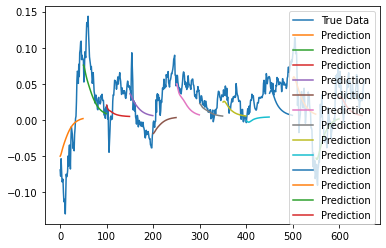

In [34]:
run.main()

[Model] Model Compiled
Time taken: 0:00:00.478344
[Model] Training Started
[Model] 2 epochs, 32 batch size, 124 batches per epoch
Epoch 1/2
124/124 [==============================] - 10s 53ms/step - loss: 0.0023
Epoch 2/2
124/124 [==============================] - 7s 60ms/step - loss: 8.1704e-04
[Model] Training Completed. Model saved as saved_models/09022021-124623-e2.h5
Time taken: 0:00:17.910524
[Model] Predicting Sequences Multiple...


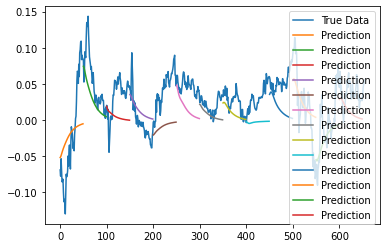

In [35]:
# after uncommenting some plots:
run.main()

Greater accuracy could most certainly be achieved with careful hyperparameter tuning.